In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
import glob


df = pd.read_csv('f1_2014_to_2022_HAM_all_data.csv') # it's for 2018 to 2022



"""
path = 'BAR_SAI'  
csv_files = glob.glob(path + "/*.csv") # ALL csv in the folder

# List 
dfs = []

# Iterate through the list of files
for filename in csv_files:
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate all the dataframes in the list into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)


print(combined_df.shape)

"""

'\npath = \'BAR_SAI\'  \ncsv_files = glob.glob(path + "/*.csv") # ALL csv in the folder\n\n# List \ndfs = []\n\n# Iterate through the list of files\nfor filename in csv_files:\n    df = pd.read_csv(filename)\n    dfs.append(df)\n\n# Concatenate all the dataframes in the list into a single dataframe\ncombined_df = pd.concat(dfs, ignore_index=True)\n\n\nprint(combined_df.shape)\n\n'

In [59]:
df['Rainfall'] = df['Rainfall'].astype(int)

df['Rainfall'].head()


0    0
1    0
2    0
3    0
4    0
Name: Rainfall, dtype: int64

In [60]:
df['LapTime'] = pd.to_timedelta(df['LapTime'])

In [61]:
df.groupby(['TrackTemp'])['LapTime'].agg([ "count"])

,count
TrackTemp,
13.8,3
13.9,12
14.0,3
14.1,3
14.2,2
...,...
56.8,1
56.9,2
57.0,2


In [62]:
# Calculate Q1, Q3, and IQR
df['LapTime'] = df['LapTime'].dt.total_seconds()

"""Q1 = df['LapTime'].quantile(0.25)
Q3 = df['LapTime'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['LapTime'] < lower_bound) | (df['LapTime'] > upper_bound)]

#  Remove outliers from the DataFrame
df_no_outliers = df[(df['LapTime'] >= lower_bound) & (df['LapTime'] <= upper_bound)]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='TrackTemp', y='LapTime', data=df_no_outliers)
plt.title('Track Temperature vs. Lap Time (Outliers Removed)')
plt.show()"""


"Q1 = df['LapTime'].quantile(0.25)\nQ3 = df['LapTime'].quantile(0.75)\nIQR = Q3 - Q1\n\n# Determine bounds for outliers\nlower_bound = Q1 - 1.5 * IQR  \nupper_bound = Q3 + 1.5 * IQR\n\n# Identify outliers\noutliers = df[(df['LapTime'] < lower_bound) | (df['LapTime'] > upper_bound)]\n\n#  Remove outliers from the DataFrame\ndf_no_outliers = df[(df['LapTime'] >= lower_bound) & (df['LapTime'] <= upper_bound)]\n\nplt.figure(figsize=(12, 6))\nsns.scatterplot(x='TrackTemp', y='LapTime', data=df_no_outliers)\nplt.title('Track Temperature vs. Lap Time (Outliers Removed)')\nplt.show()"

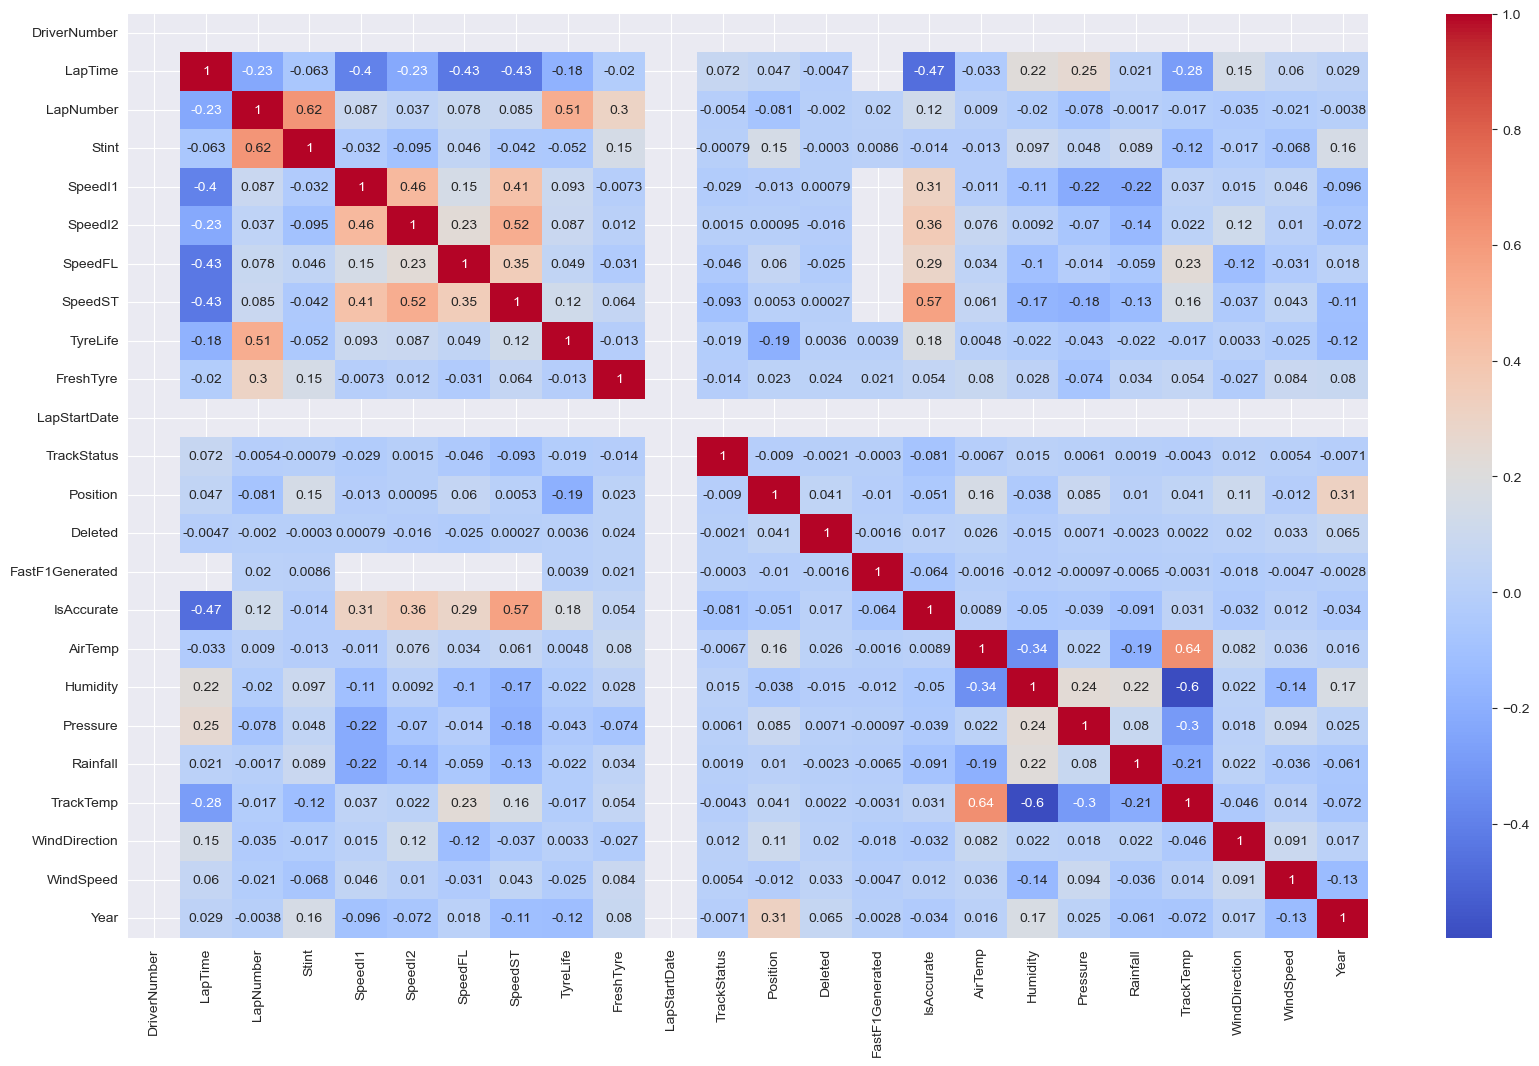

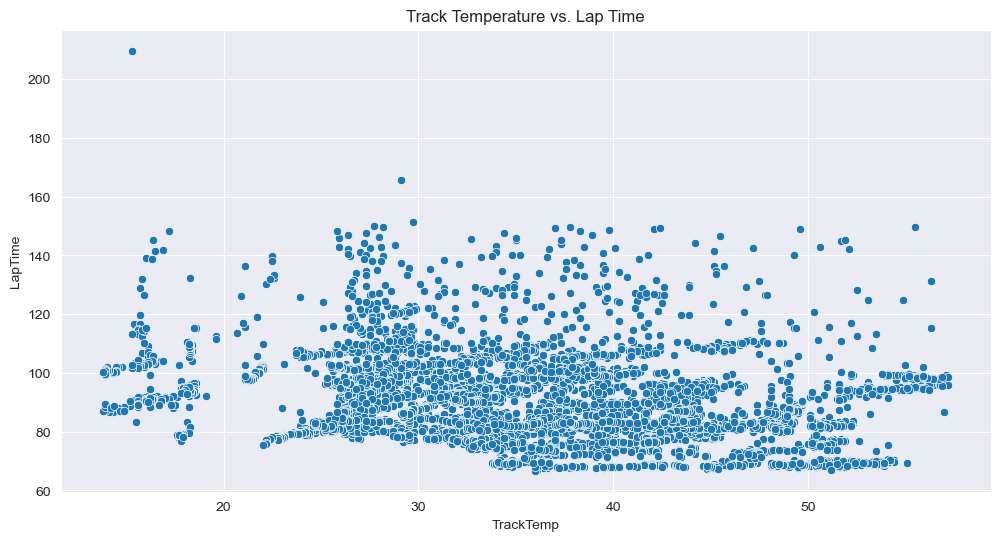

In [63]:
corr_matrix = df.corr(numeric_only=True)

# Heatmap to visualize correlations
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Scatter plot for Track Temperature vs. Lap Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TrackTemp', y='LapTime', data=df)
plt.title('Track Temperature vs. Lap Time')
plt.show()

<Axes: xlabel='LapTime', ylabel='Count'>

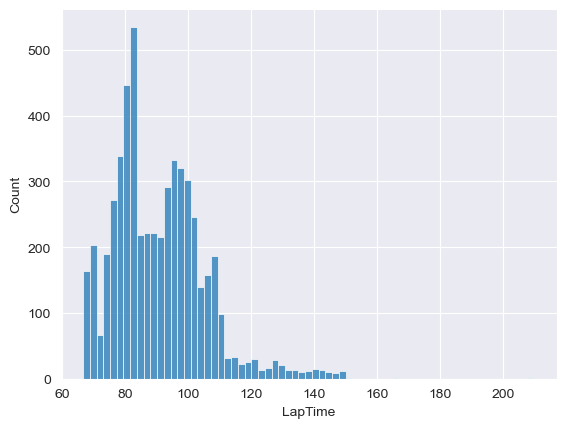

In [64]:
sns.histplot(x='LapTime', data=df)

In [65]:
import pandas as pd

# Use pd.get_dummies to convert 'Circuit' column to one-hot encoded variables
one_hot_encoded_data = pd.get_dummies(df['Circuit'], prefix='Circuit')

# Join the one-hot encoded columns back with the original DataFrame
df= df.join(one_hot_encoded_data)

# Now df_one_hot contains the original data along with the one-hot encoded circuit columns

df.head()


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Circuit_Portuguese Grand Prix,Circuit_Qatar Grand Prix,Circuit_Russian Grand Prix,Circuit_Saudi Arabian Grand Prix,Circuit_Singapore Grand Prix,Circuit_Spanish Grand Prix,Circuit_Styrian Grand Prix,Circuit_Turkish Grand Prix,Circuit_Tuscan Grand Prix,Circuit_United States Grand Prix
0,0 days 00:07:57.159000,HAM,44,94.233,1.0,NaN,NaN,NaN,NaN,0 days 00:00:23.820000,...,0,0,0,0,0,0,0,0,0,0
1,0 days 00:08:58.221000,HAM,44,90.265,2.0,NaN,NaN,NaN,0 days 00:00:30.261000,0 days 00:00:24.081000,...,0,0,0,0,0,0,0,0,0,0
2,0 days 00:10:57.202000,HAM,44,89.809,3.0,1.0,NaN,NaN,0 days 00:00:30.055000,0 days 00:00:24.031000,...,0,0,0,0,0,0,0,0,0,0
3,0 days 00:11:57.661000,HAM,44,89.473,4.0,1.0,NaN,NaN,0 days 00:00:29.886000,0 days 00:00:23.950000,...,0,0,0,0,0,0,0,0,0,0
4,0 days 00:13:57.637000,HAM,44,89.161,5.0,1.0,NaN,NaN,0 days 00:00:29.719000,0 days 00:00:23.909000,...,0,0,0,0,0,0,0,0,0,0


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Circuit_Portuguese Grand Prix,Circuit_Qatar Grand Prix,Circuit_Russian Grand Prix,Circuit_Saudi Arabian Grand Prix,Circuit_Singapore Grand Prix,Circuit_Spanish Grand Prix,Circuit_Styrian Grand Prix,Circuit_Turkish Grand Prix,Circuit_Tuscan Grand Prix,Circuit_United States Grand Prix
0,0 days 00:07:57.159000,HAM,44,94.233,1.0,NaN,NaN,NaN,NaN,0 days 00:00:23.820000,...,0,0,0,0,0,0,0,0,0,0
1,0 days 00:08:58.221000,HAM,44,90.265,2.0,NaN,NaN,NaN,0 days 00:00:30.261000,0 days 00:00:24.081000,...,0,0,0,0,0,0,0,0,0,0
2,0 days 00:10:57.202000,HAM,44,89.809,3.0,1.0,NaN,NaN,0 days 00:00:30.055000,0 days 00:00:24.031000,...,0,0,0,0,0,0,0,0,0,0
3,0 days 00:11:57.661000,HAM,44,89.473,4.0,1.0,NaN,NaN,0 days 00:00:29.886000,0 days 00:00:23.950000,...,0,0,0,0,0,0,0,0,0,0
4,0 days 00:13:57.637000,HAM,44,89.161,5.0,1.0,NaN,NaN,0 days 00:00:29.719000,0 days 00:00:23.909000,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='TrackTemp', ylabel='LapTime'>

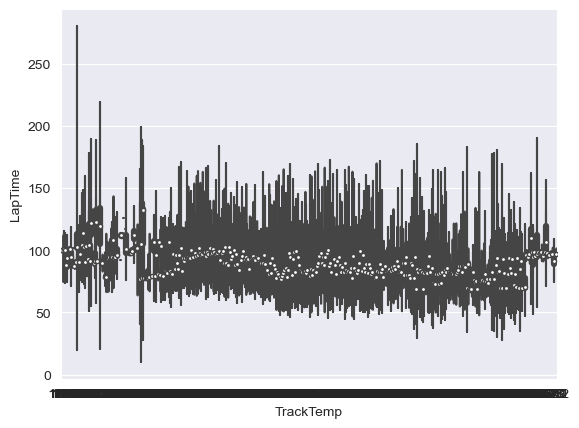

In [67]:
# sns.violinplot(x='TrackTemp', y='LapTime', data=df)

<Axes: xlabel='TrackTemp', ylabel='LapTime'>

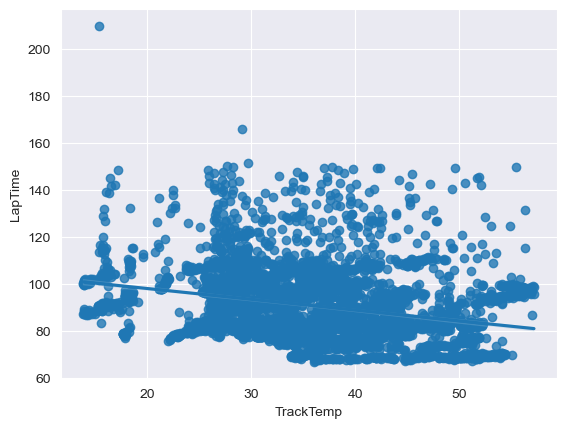

In [68]:
# sns.regplot(x='TrackTemp', y='LapTime', data=df)

In [73]:
# Handling missing values
# You might decide to fill missing values with a median or mean, or drop them
# df.fillna(df.median(), inplace=True ) # For numerical columns


In [70]:
""" from sklearn.preprocessing import StandardScaler

# Fit the scaler on the selected columns
scaler = StandardScaler().fit(df[['LapTime', 'TrackTemp']])

# Transform the selected columns and store in a new DataFrame
scaled_columns = scaler.transform(df[['LapTime', 'TrackTemp']])

# Create a DataFrame from the scaled columns with the same index as df
scaled_df = pd.DataFrame(scaled_columns, index=df.index, columns=['LapTime_scaled', 'TrackTemp_scaled'])

# Now you can merge the scaled columns back into the original DataFrame
df = df.drop(['LapTime', 'TrackTemp'], axis=1)
df = pd.concat([df, scaled_df], axis=1)
"""

" from sklearn.preprocessing import StandardScaler\n\n# Fit the scaler on the selected columns\nscaler = StandardScaler().fit(df[['LapTime', 'TrackTemp']])\n\n# Transform the selected columns and store in a new DataFrame\nscaled_columns = scaler.transform(df[['LapTime', 'TrackTemp']])\n\n# Create a DataFrame from the scaled columns with the same index as df\nscaled_df = pd.DataFrame(scaled_columns, index=df.index, columns=['LapTime_scaled', 'TrackTemp_scaled'])\n\n# Now you can merge the scaled columns back into the original DataFrame\ndf = df.drop(['LapTime', 'TrackTemp'], axis=1)\ndf = pd.concat([df, scaled_df], axis=1)\n"

In [72]:
""" from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler = RobustScaler()

# Fit and transform the columns
scaled_data = scaler.fit_transform(df[['LapTime', 'TrackTemp']])

# Create a DataFrame from the scaled data with the same index as 'df' and new column names
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=['LapTime_scaled1', 'TrackTemp_scaled2'])

# Drop the original 'LapTime' and 'TrackTemp' columns from 'df' if you no longer need them

df = df.drop(['LapTime', 'TrackTemp'], axis=1)


df = df.drop(['LapTime_scaled', 'TrackTemp_scaled'], axis=1)

# merge the scaled columns back into the original DataFrame
df = pd.concat([df, scaled_df], axis=1)
"""

" from sklearn.preprocessing import RobustScaler\nimport pandas as pd\n\nscaler = RobustScaler()\n\n# Fit and transform the columns\nscaled_data = scaler.fit_transform(df[['LapTime', 'TrackTemp']])\n\n# Create a DataFrame from the scaled data with the same index as 'df' and new column names\nscaled_df = pd.DataFrame(scaled_data, index=df.index, columns=['LapTime_scaled1', 'TrackTemp_scaled2'])\n\n# Drop the original 'LapTime' and 'TrackTemp' columns from 'df' if you no longer need them\n\ndf = df.drop(['LapTime', 'TrackTemp'], axis=1)\n\n\ndf = df.drop(['LapTime_scaled', 'TrackTemp_scaled'], axis=1)\n\n# merge the scaled columns back into the original DataFrame\ndf = pd.concat([df, scaled_df], axis=1)\n"